In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [148]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [149]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Are there missing values?

In [150]:
data.isna().any().any()

False

In [151]:
data[data['price'] == 0].shape[0]

0

In [152]:
(data == 0).any()[(data == 0).any() == True]

bedrooms         True
bathrooms        True
waterfront       True
view             True
sqft_basement    True
yr_renovated     True
dtype: bool

In [153]:
# some houses have 0 bedrooms
data[data['bedrooms'] == 0].shape[0]

13

In [154]:
data[data['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [155]:
# some houses have 0 bathrooms
data[data['bathrooms'] == 0].shape[0]

10

In [156]:
data[data['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [157]:
# remove rows with 0 bedrooms
idx_zero_bedrooms = data[data['bedrooms'] == 0].index
data = data.drop(idx_zero_bedrooms).reset_index(drop=True)

In [158]:
# remove rows with 0 bathrooms
idx_zero_bathrooms = data[data['bathrooms'] == 0].index
data = data.drop(idx_zero_bathrooms).reset_index(drop=True)

In [159]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [160]:
# bathrooms is of float type
data['bathrooms'].dtype

dtype('float64')

In [161]:
def unique_values(column: str) -> np.ndarray:
    values: np.ndarray = data[column].unique()
    values.sort()
    return values

In [162]:
unique_values('bathrooms')

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.  , 6.25, 6.5 , 6.75, 7.5 , 7.75, 8.  ])

In the United States, there is a lack of a single definition. This commonly results in discrepancies between advertised and actual number of baths in real estate listings. Bathrooms are generally categorized as "master bathroom", containing a shower and a bathtub that is adjoining to the largest bedroom; a "full bathroom" (or "full bath"), containing four plumbing fixtures: a toilet and sink, and either a bathtub with a shower, or a bathtub and a separate shower stall; "half bath" (or "powder room") containing just a toilet and sink; and "3/4 bath" containing toilet, sink, and shower, although the terms vary from market to market. In some U.S. markets, a toilet, sink, and shower are considered a "full bath." In addition, there is the use of the word "bathroom" to describe a room containing a toilet and a basin, and nothing else.

In [163]:
unique_values('bedrooms')

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33])

In [164]:
# floors are also of float type
unique_values('floors')

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

In [165]:
unique_values('waterfront')

array([0, 1])

In [166]:
# I don't know what 2 or more views means
unique_values('view')

array([0, 1, 2, 3, 4])

In [167]:
unique_values('grade')

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [168]:
def bar_values(column):
    plt.figure(figsize=(15,3))
    plt.xticks(unique_values(column),rotation=90)
    plt.bar(unique_values(column), data.groupby(column)[column].count())

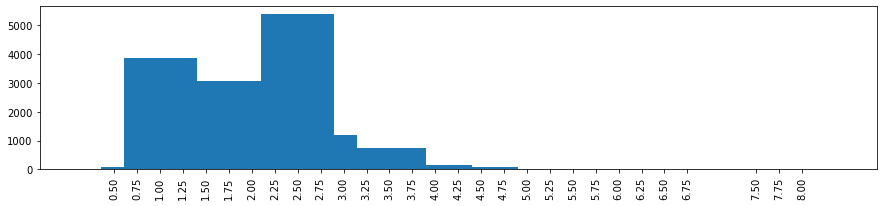

In [169]:
bar_values('bathrooms')

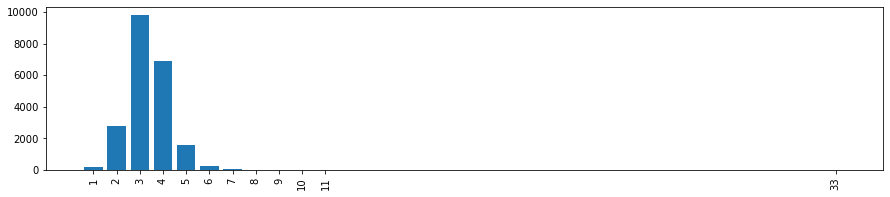

In [170]:
bar_values('bedrooms')

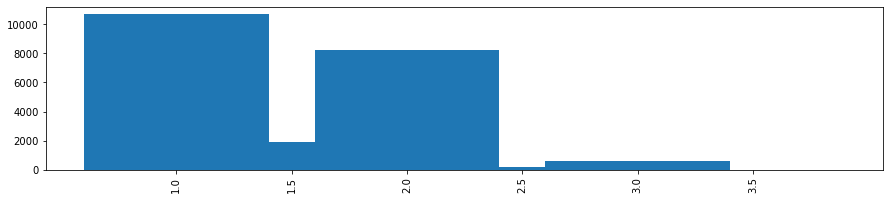

In [171]:
bar_values('floors')

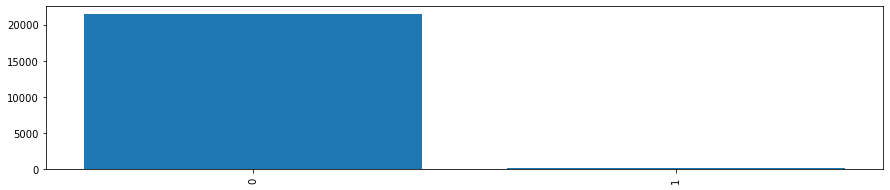

In [172]:
bar_values('waterfront')

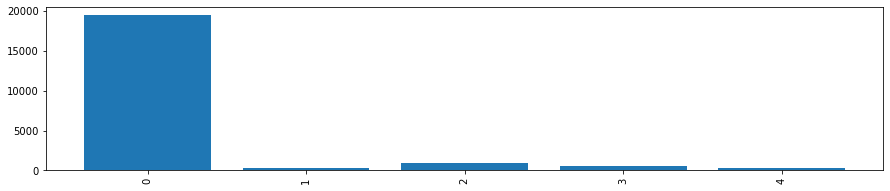

In [173]:
bar_values('view')

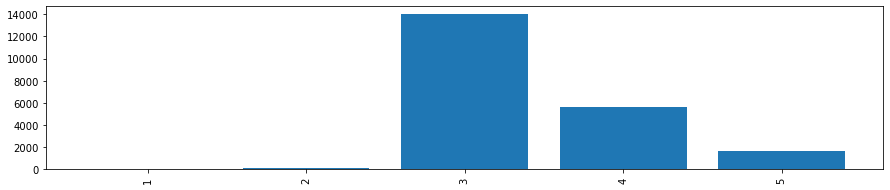

In [174]:
bar_values('condition')

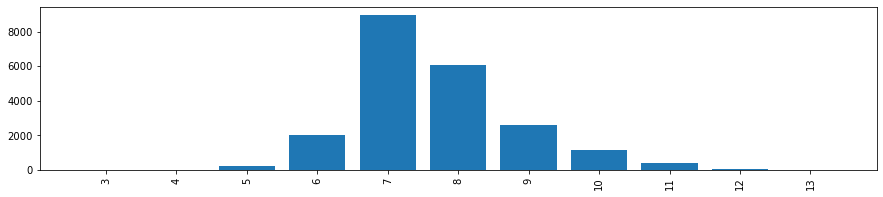

In [175]:
bar_values('grade')

### What's the average house price?

In [176]:
avg_price = data.mean()['price'].round()
avg_price

540203.0

In [177]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
locale.getlocale()

('en_US', 'UTF-8')

In [178]:
locale.currency(avg_price, grouping=True)

'$540,203.00'

### What's the price standard deviation?

In [179]:
price_std_deviation = data.std()['price'].round(2)
locale.currency(price_std_deviation, grouping=True)

'$367,133.73'

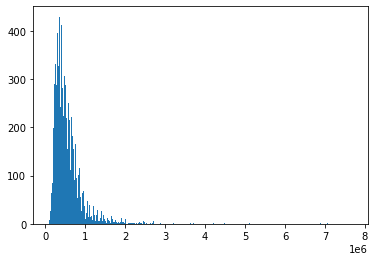

In [180]:
plt.hist(data['price'], bins = 1000);

### What are the Q1 and Q3 of the prices?

In [181]:
q1 = data['price'].quantile([0.25, 0.75]).iloc[0]
q3 =  data['price'].quantile([0.25, 0.75]).iloc[1]

In [182]:
# Q1
locale.currency(q1, grouping=True)

'$322,000.00'

In [183]:
# Q3
locale.currency(q3, grouping=True)

'$645,000.00'

### Are there pricing outliers?


#### Outliers := below $Q_1 - 1.5 \times IQR$ and above $Q_3 +  1.5 \times IQR$

In [184]:
iqr = q3 - q1
iqr

323000.0

In [185]:
minimum = q1 - 1.5*iqr
minimum

-162500.0

In [186]:
maximum = q3 + 1.5*iqr
maximum

1129500.0

In [187]:
# no data below minimum, since prices can't be negative
data[data['price'] < minimum].shape[0]

0

In [188]:
data[data['price'] > maximum].shape[0]

1145

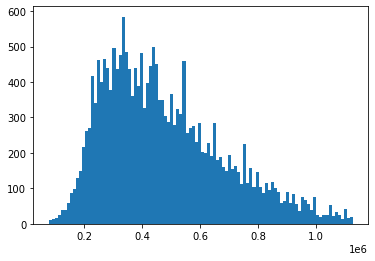

In [189]:
# histogram of prices without outliers
plt.hist(data[data['price'] < maximum]['price'], bins = 100);

In [190]:
# remove outliers
data = data[data['price'] < maximum]

In [191]:
control = data[(data['bathrooms'] == 2.5) 
               & (data['bedrooms'] == 3) 
               & (data['floors'] == 2) 
               & (data['waterfront'] == 0) 
               & (data['view'] == 0) 
               & (data['condition'] == 3) 
               & (data['grade'] == 7)]

In [192]:
control

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
180,3830630310,20140725T000000,260000.0,3,2.5,1670,5797,2.0,0,0,...,7,1670,0,1988,0,98030,47.3505,-122.179,1670,6183
198,2824079053,20150113T000000,440000.0,3,2.5,1910,66211,2.0,0,0,...,7,1910,0,1997,0,98024,47.5385,-121.911,2330,67268
229,7202340400,20150303T000000,516500.0,3,2.5,1480,4729,2.0,0,0,...,7,1480,0,2004,0,98053,47.6794,-122.034,2250,4729
254,3830630060,20140929T000000,245000.0,3,2.5,1730,7442,2.0,0,0,...,7,1730,0,1987,0,98030,47.3507,-122.178,1630,6458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21430,3630080120,20140919T000000,358000.0,3,2.5,1400,1529,2.0,0,0,...,7,1400,0,2005,0,98029,47.5535,-121.997,1440,1536
21431,7853360620,20140701T000000,425000.0,3,2.5,1950,5689,2.0,0,0,...,7,1950,0,2009,0,98065,47.5158,-121.873,2190,5653
21459,100300530,20140925T000000,330000.0,3,2.5,1520,3003,2.0,0,0,...,7,1520,0,2009,0,98059,47.4876,-122.153,1820,3030
21568,952006823,20141202T000000,380000.0,3,2.5,1260,900,2.0,0,0,...,7,940,320,2007,0,98116,47.5621,-122.384,1310,1415


In [193]:
experiment = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
          'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# experiment.append('date')

In [194]:
def inspect(dataset):
    fig, axs = plt.subplots(3, 4, figsize=(15,10))
    fig.tight_layout(pad=3.0)

    i=0
    j=0
    for c in experiment:
        axs[i][j].set_title(c)
        axs[i][j].scatter(dataset[c], dataset['price'])

        j = j+1
        i = i+1 if (j == 4) else i
        j = j%4

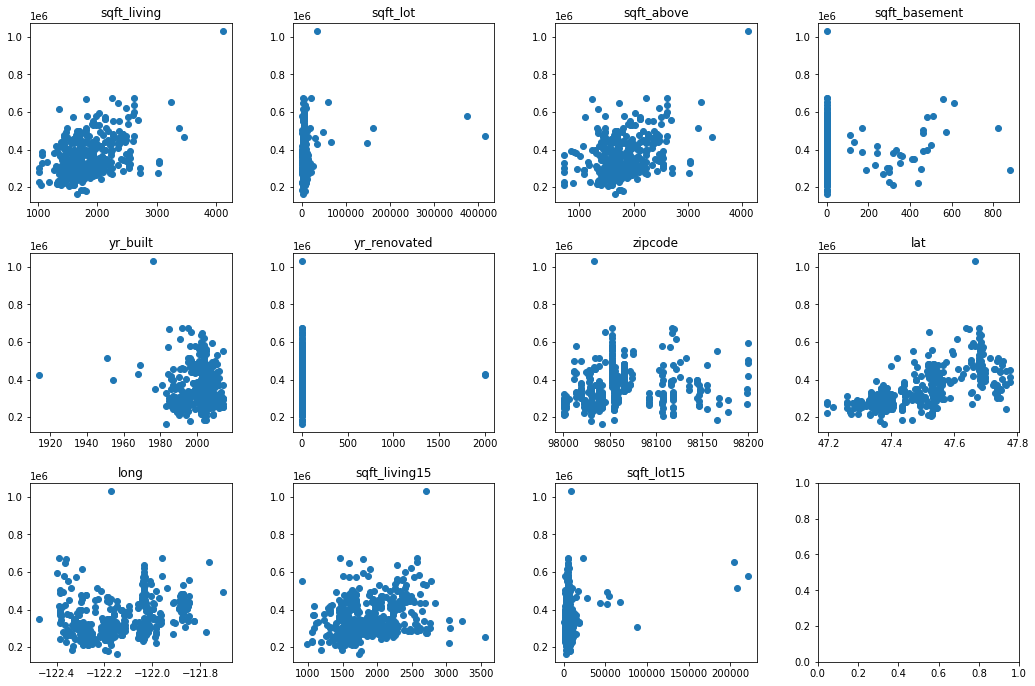

In [195]:
inspect(control)

In [196]:
control2 = data[(data['bathrooms'] == 2.25) 
               & (data['bedrooms'] == 3) 
               & (data['floors'] == 1) 
               & (data['waterfront'] == 0) 
               & (data['view'] == 0) 
               & (data['condition'] == 3) 
               & (data['grade'] == 7)]

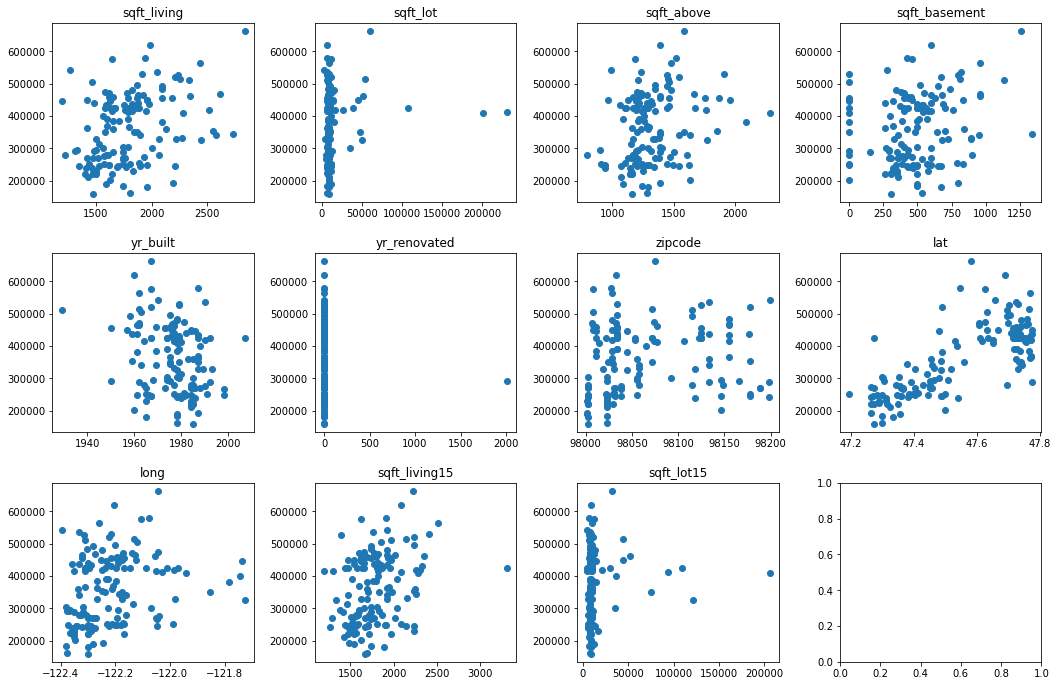

In [197]:
inspect(control2)

In [198]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.631676
sqft_living      0.622123
sqft_living15    0.562117
sqft_above       0.530190
bathrooms        0.456252
lat              0.430606
bedrooms         0.296641
floors           0.273924
view             0.237994
sqft_basement    0.235538
sqft_lot         0.094345
yr_renovated     0.083550
sqft_lot15       0.083111
long             0.071787
yr_built         0.061152
waterfront       0.051452
condition        0.037704
id               0.010401
zipcode         -0.018931
Name: price, dtype: float64

In [217]:
def fit_line(dataset, column):
    X_train, X_test, y_train, y_test = train_test_split(dataset[column], dataset['price'], test_size=0.2)
    X_train = pd.DataFrame(X_train)
    reg = LinearRegression().fit(X_train, y_train)
    model_line = (X_train * reg.coef_) + reg.intercept_
    plt.scatter(X_train, y_train)
    plt.plot(X_train, model_line, color='red')

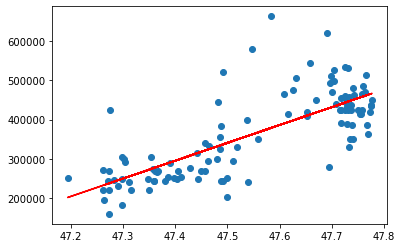

In [218]:
fit_line(control2, 'lat')

In [234]:
def fit_lines(dataset):
    fig, axs = plt.subplots(3, 4, figsize=(15,10))
    fig.tight_layout(pad=3.0)

    i=0
    j=0
    for c in experiment:   
        X_train, X_test, y_train, y_test = train_test_split(dataset[c], dataset['price'], test_size=0.2)
        X_train = pd.DataFrame(X_train)
        reg = LinearRegression().fit(X_train, y_train)
        model_line = (X_train * reg.coef_) + reg.intercept_
        axs[i][j].set_title(c)
        axs[i][j].scatter(X_train, y_train)
        axs[i][j].plot(X_train, model_line, color='red')
        j = j+1
        i = i+1 if (j == 4) else i
        j = j%4

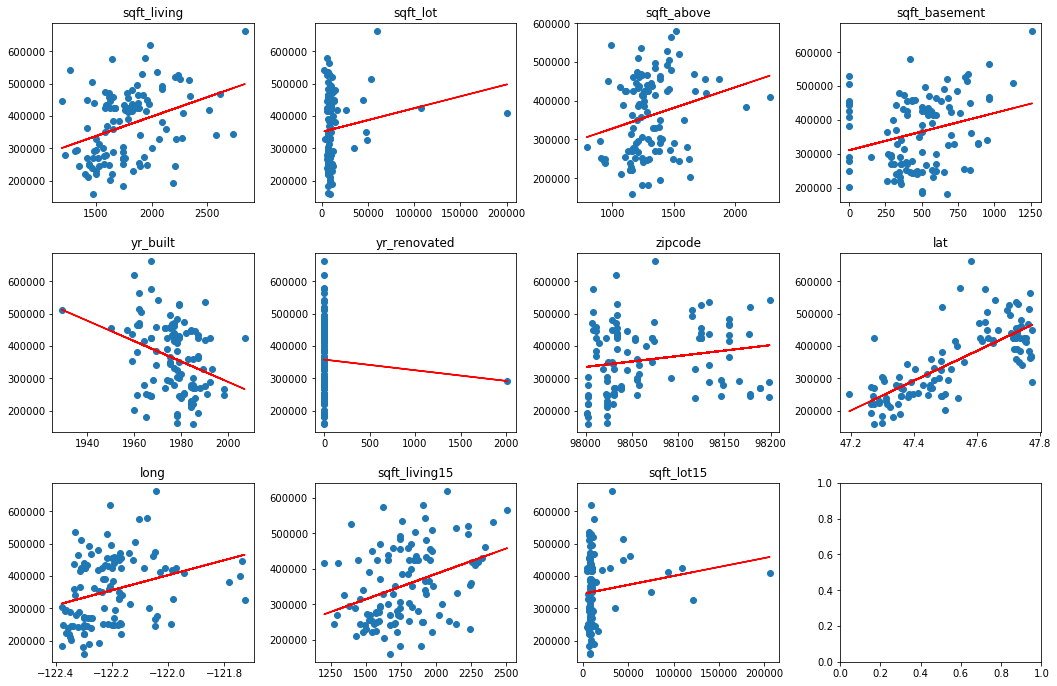

In [235]:
fit_lines(control2)